In [1]:
# 1- Put centers randomly
# 2- Get means 'root(sqr(y2-y1)+sqr(x2-x1))' between every point and every center
# 3- Labeling points (each point belong to closest center)
# 4- Moving each centers to average to their point 
# 5- Repeat 2, 3, 4 untill no changes happen 'optimum values'
########### Evaluation
# if the sum side distance is the smallest so it is the best clustering
# there is hemogenous between points in the same cluster 'within cluster variance' , wcv => min 
# there is hetrogenous between points in diffrent cluster 'between cluster variance' , bcv => max
######### How to know the number of clusters
# get clusters from 2 to 10, calculate the SSD , find the elbow => this is the best number of clusters

In [81]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [31]:
data = pd.read_csv('bank-full.csv')

In [33]:
data.shape

(41188, 21)

In [35]:
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed  subscribed  
0           5191.0          no  
1           5191.0          no  
2           5191.0          no  
3           5191.0          no  
4           5191.0          no  
...            ...         ...  
41183       4963.6         yes  
41184       4963.6          no  
41185       4963.6          no  
41186       4963.6         yes  
41187       4963.6          no  

[41188 rows x 21 columns]

In [37]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [41]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [43]:
TheseColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome', 'subscribed']
data[TheseColumns]

job  marital            education  default housing loan  \
0        housemaid  married             basic.4y       no      no   no   
1         services  married          high.school  unknown      no   no   
2         services  married          high.school       no     yes   no   
3           admin.  married             basic.6y       no      no   no   
4         services  married          high.school       no      no  yes   
...            ...      ...                  ...      ...     ...  ...   
41183      retired  married  professional.course       no     yes   no   
41184  blue-collar  married  professional.course       no      no   no   
41185      retired  married    university.degree       no     yes   no   
41186   technician  married  professional.course       no      no   no   
41187      retired  married  professional.course       no     yes   no   

         contact month day_of_week     poutcome subscribed  
0      telephone   may         mon  nonexistent         no  
1      telephone   may         mon  nonexistent         no  
2      telephone   may         mon  nonexistent         no  
3      telephone   may         mon  nonexistent         no  
4      telephone   may         mon  nonexistent         no  
...          ...   ...         ...          ...        ...  
41183   cellular   nov         fri  nonexistent        yes  
41184   cellular   nov         fri  nonexistent         no  
41185   cellular   nov         fri  nonexistent         no  
41186   cellular   nov         fri  nonexistent        yes  
41187   cellular   nov         fri      failure         no  

[41188 rows x 11 columns]

In [45]:
for i in TheseColumns :
    Dict = {i:j for i,j in zip(data[i].unique(),range(data[i].nunique()))}
    data[f'Enc_{i}']= data[i].map(Dict)
    data.drop([i],axis=1,inplace=True)

In [47]:
data

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  ...  Enc_marital  Enc_education  \
0              -36.4      4.857       5191.0  ...            0              0   
1              -36.4      4.857       5191.0  ...            0              1   
2              -36.4      4.857       5191.0  ...            0              1   
3              -36.4      4.857       5191.0  ...            0              2   
4              -36.4      4.857       5191.0  ...            0              1   
...              ...        ...          ...  ...          ...            ...   
41183          -50.8      1.028       4963.6  ...            0              4   
41184          -50.8      1.028       4963.6  ...            0              4   
41185          -50.8      1.028       4963.6  ...            0              6   
41186          -50.8      1.028       4963.6  ...            0              4   
41187          -50.8      1.028       4963.6  ...            0              4   

       Enc_default  Enc_housing  Enc_loan  Enc_contact  Enc_month  \
0                0            0         0            0          0   
1                1            0         0            0          0   
2                0            1         0            0          0   
3                0            0         0            0          0   
4                0            0         1            0          0   
...            ...          ...       ...          ...        ...   
41183            0            1         0            1          5   
41184            0            0         0            1          5   
41185            0            1         0            1          5   
41186            0            0         0            1          5   
41187            0            1         0            1          5   

       Enc_day_of_week  Enc_poutcome  Enc_subscribed  
0                    0             0               0  
1                    0             0               0  
2                    0             0               0  
3                    0             0               0  
4                    0             0               0  
...                ...           ...             ...  
41183                4             0               1  
41184                4             0               0  
41185                4             0               0  
41186                4             0               1  
41187                4             1               0  

[41188 rows x 21 columns]

In [55]:
KMeansModel = KMeans(n_clusters=5,init='k-means++',random_state=33,algorithm='auto')

In [57]:
KMeansModel.fit(data)

C:\Users\Farida\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Farida\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=5, random_state=33)

In [63]:
pd.DataFrame(KMeansModel.cluster_centers_,columns= data.columns,index=['ClusterA','ClusterB','ClusterC','ClusterD','ClusterE'])

age     duration  campaign       pdays  previous  \
ClusterA  39.952220   118.726965  2.756904  999.000000  0.112749   
ClusterB  39.987546   712.602887  2.437305  999.000000  0.102462   
ClusterC  41.873502   309.368842  1.821571    5.996671  1.663782   
ClusterD  39.971220   336.633244  2.282077  999.000000  0.130339   
ClusterE  39.614173  1432.751969  2.604987  982.094488  0.107612   

          emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
ClusterA      0.237625       93.589672     -40.526171   3.810360  5176.590057   
ClusterB      0.148684       93.595625     -40.896207   3.687353  5170.911803   
ClusterC     -2.096538       93.342629     -38.338282   0.986428  5029.293076   
ClusterD      0.001550       93.567519     -40.608920   3.528272  5162.850023   
ClusterE      0.191470       93.607064     -40.671785   3.740640  5172.312992   

          ...  Enc_marital  Enc_education  Enc_default  Enc_housing  Enc_loan  \
ClusterA  ...     0.505621       3.294990     0.218574     0.574216  0.203381   
ClusterB  ...     0.506935       3.214265     0.211152     0.553071  0.186810   
ClusterC  ...     0.573236       3.665779     0.039947     0.595206  0.198402   
ClusterD  ...     0.514251       3.210128     0.210313     0.570704  0.193986   
ClusterE  ...     0.514436       3.202100     0.198163     0.556430  0.228346   

          Enc_contact  Enc_month  Enc_day_of_week  Enc_poutcome  \
ClusterA     0.616986   2.167495         1.971365      0.102240   
ClusterB     0.659779   2.277385         2.031135      0.090292   
ClusterC     0.928096   3.917443         1.939414      1.906125   
ClusterD     0.624481   2.189097         1.977493      0.112628   
ClusterE     0.658793   2.366142         2.114173      0.111549   

          Enc_subscribed  
ClusterA        0.024929  
ClusterB        0.390603  
ClusterC        0.637816  
ClusterD        0.114381  
ClusterE        0.590551  

[5 rows x 21 columns]

In [71]:
pd.Series(KMeansModel.labels_).value_counts()

0    24550
3    10841
1     3532
2     1502
4      763
Name: count, dtype: int64

In [73]:
KMeansModel.inertia_

643187364.8970124

In [75]:
InertiaDict = {}
for i in range(2,16):
    KMeansModeli = KMeans(n_clusters=i,init='k-means++',random_state=33,algorithm='auto')
    KMeansModeli.fit(data)
    InertiaDict[i] = KMeansModeli.inertia_

C:\Users\Farida\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Farida\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Farida\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Farida\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Farida\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 

In [79]:
InertiaDict # error percentage

{2: 2736050548.8034105,
 3: 1321618721.4065883,
 4: 851640625.4077616,
 5: 643187364.8970124,
 6: 532028622.37143254,
 7: 440889318.6829541,
 8: 377539644.1481391,
 9: 327103191.5489191,
 10: 285480491.8870211,
 11: 247228764.61388618,
 12: 218601435.1955389,
 13: 199150270.52088577,
 14: 182271342.53947872,
 15: 168985573.04404992}

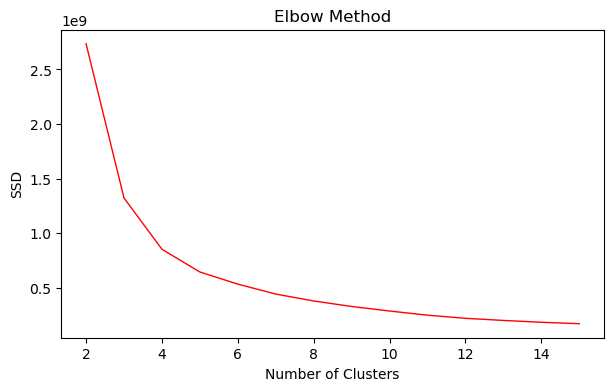

In [83]:
plt.figure(figsize = (7,4))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')

XGraph = InertiaDict.keys()
YGraph = InertiaDict.values()

plt.plot(XGraph,YGraph,linewidth=1,color='r',alpha=1,linestyle='solid')

In [ ]:
S